<a href="https://colab.research.google.com/github/JainArpit-07/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#**Categorical**
*   Survived
*   PClass
*   Sex
*   SibSp
*   Parch
*   Embarked

#**Numerical Columns**
*   Age
*   Fare
*   PassengerId


#**Mixed Columns**


*   Name
*   Ticket
*   Cabin




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop(columns = ['Cabin'], inplace = True)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    imputer = SimpleImputer(strategy="mean")
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer())])

In [ ]:
df = pipeline.fit_transform(df)

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].fillna('S', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [ ]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


#Univariate Analysis
##Age

In [ ]:
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print(f"Out of 891, {death_percent}% people died in the accident")

Out of 891, 62% people died in the accident


In [ ]:
print((df['Pclass'].value_counts()/891)*100)

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


In [ ]:
print((df['Sex'].value_counts()/891)*100)

male      64.758698
female    35.241302
Name: Sex, dtype: float64


In [ ]:
print(df['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [ ]:
print((df['Parch'].value_counts()/891)*100)

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


In [ ]:
print((df['Embarked'].value_counts()/891)*100)

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


Skewness = 0.45956263424701577
Kurtosis = 0.9865867453652877


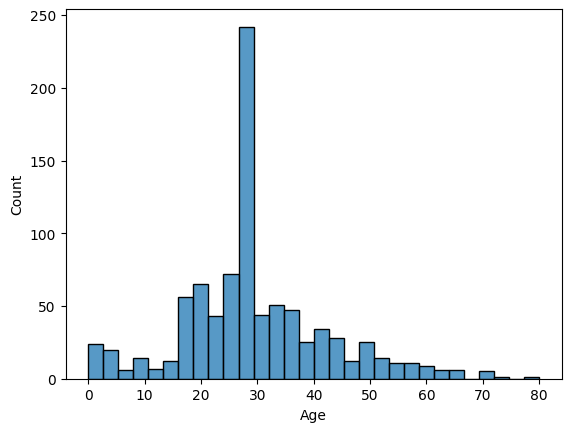

In [ ]:
sns.histplot(df['Age'])
print("Skewness =", df['Age'].skew())
print("Kurtosis =", df['Age'].kurt())

Most of the people were between the age of 20-40

<Axes: >

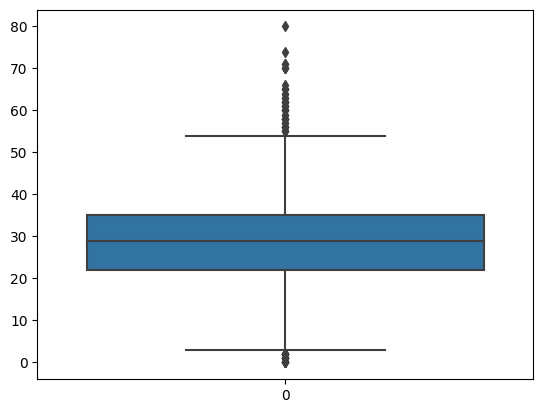

In [ ]:
sns.boxplot(df['Age'])

Median ~28

###Conclusion


*   For all practical purposes age can be considered as normal distribution
*   Deeper analysis is required for outlier detection



##Fare

Skewness = 4.787316519674893
Kurtosis = 33.39814088089868


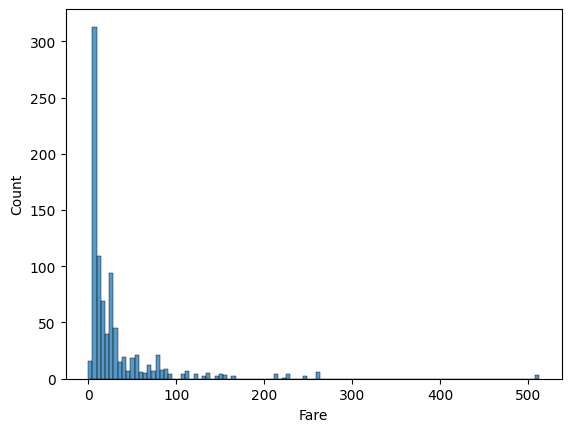

In [ ]:
sns.histplot(df['Fare'])
print("Skewness =", df['Fare'].skew())
print("Kurtosis =", df['Fare'].kurt())

Not normal, exteremely skewed and peeked



<Axes: >

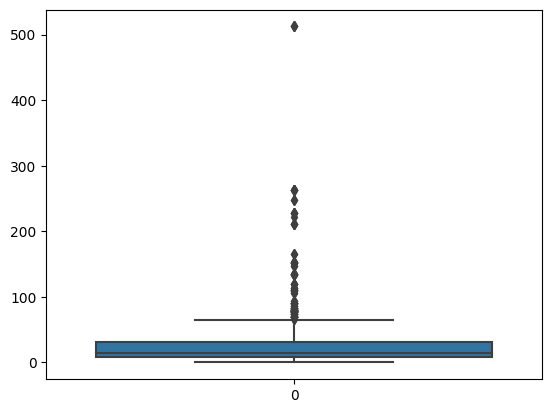

In [ ]:
sns.boxplot(df['Fare'])

###Conclusion


*   Highly skewed data, a lot of people had cheaper tickets
*   Outliers are there in the data



#Multivariate Analysis

##Survival with Pclass

In [ ]:
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


##Survival with Pclass

In [ ]:
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


##Survival with Embarked

In [ ]:
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


##Survived with Age

<Axes: xlabel='Age', ylabel='Count'>

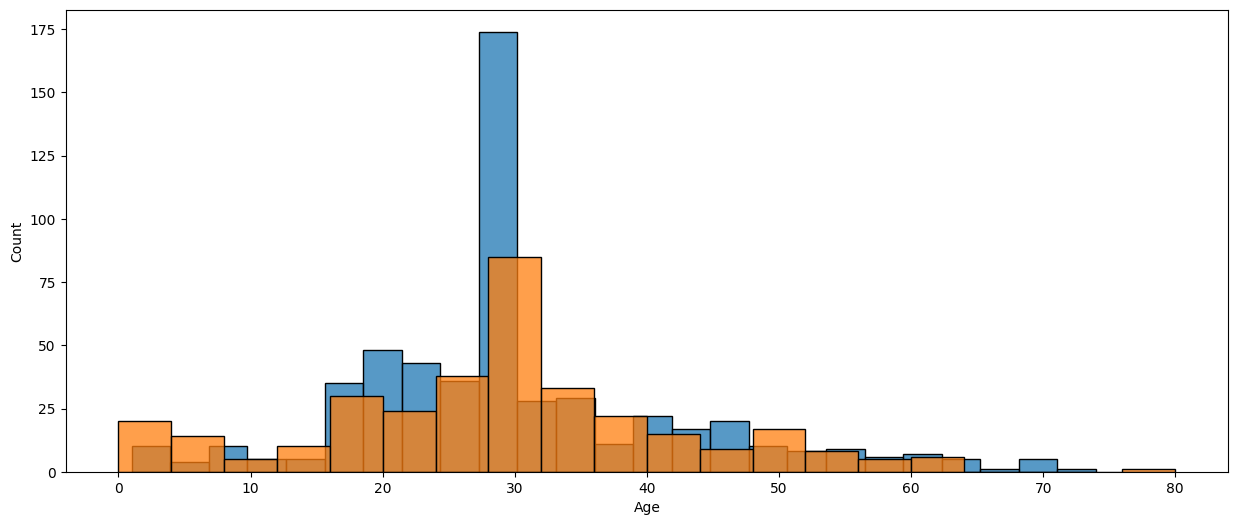

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(df[df['Survived']==0]['Age'])
sns.histplot(df[df['Survived']==1]['Age'])

##Survived with Fare

<Axes: xlabel='Fare', ylabel='Count'>

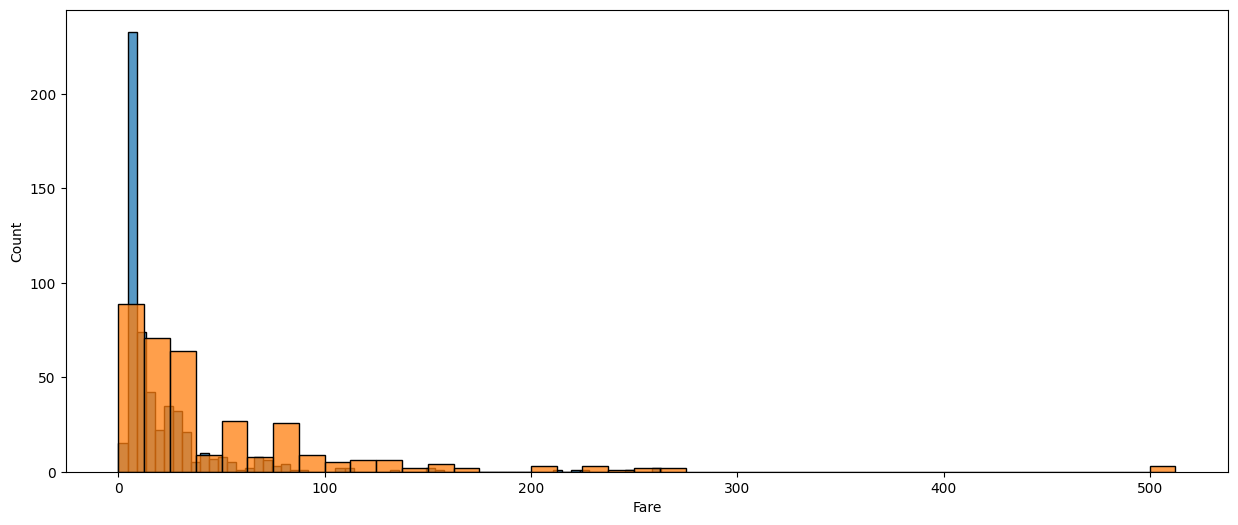

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(df[df['Survived']==0]['Fare'])
sns.histplot(df[df['Survived']==1]['Fare'])

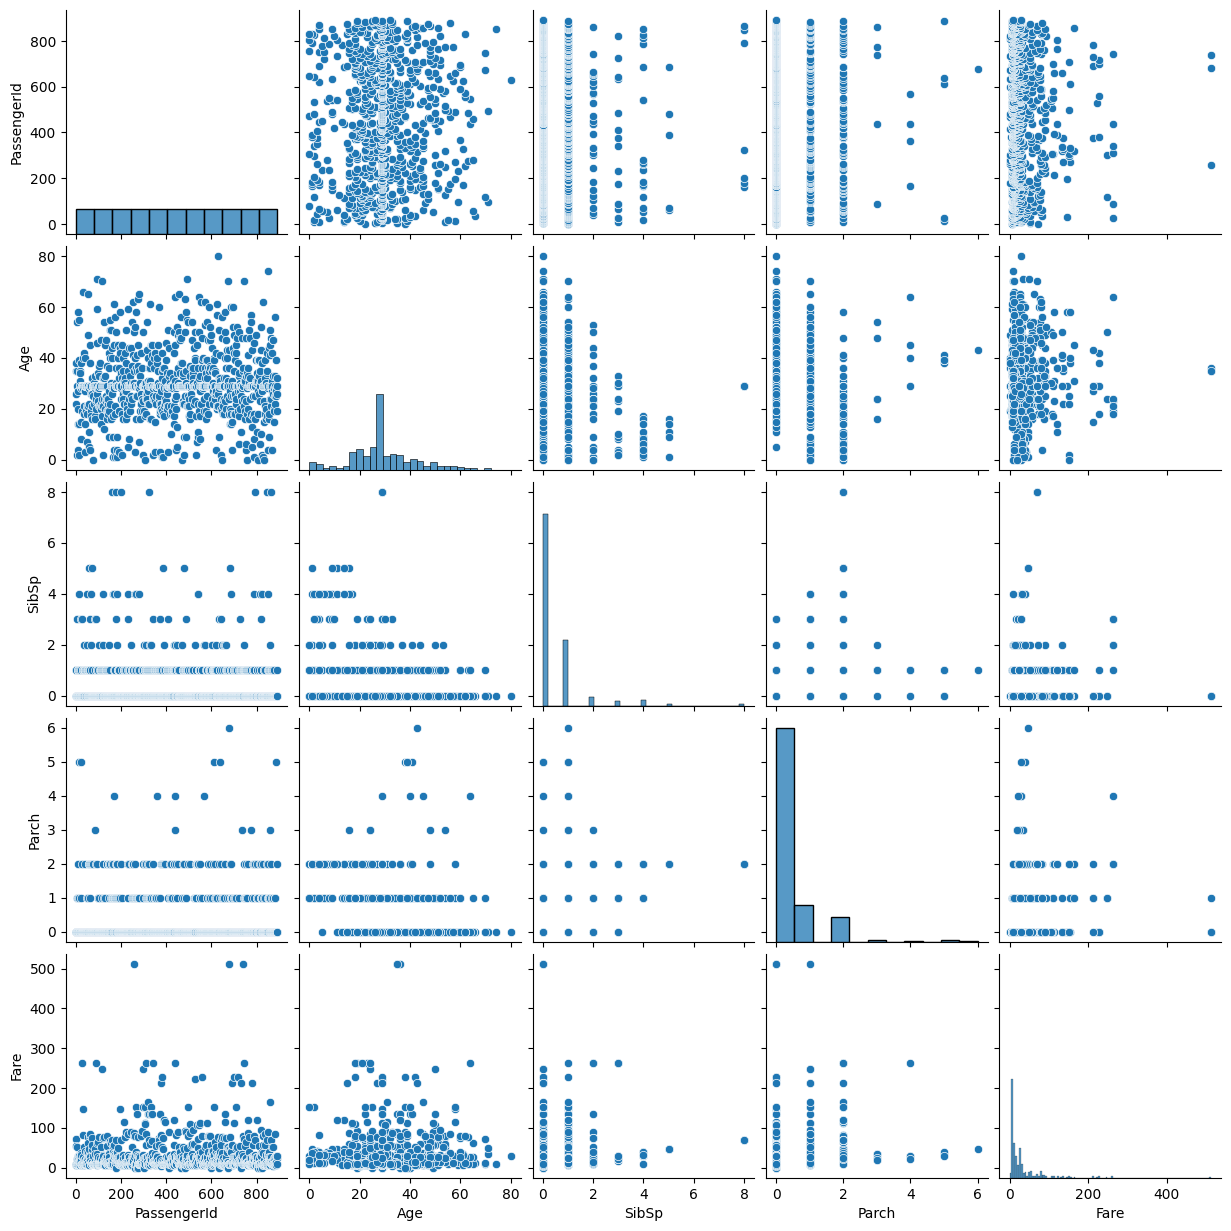

In [ ]:
sns.pairplot(df)

<ipython-input-56-2f1cd7a36dd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "YlGnBu")


<Axes: >

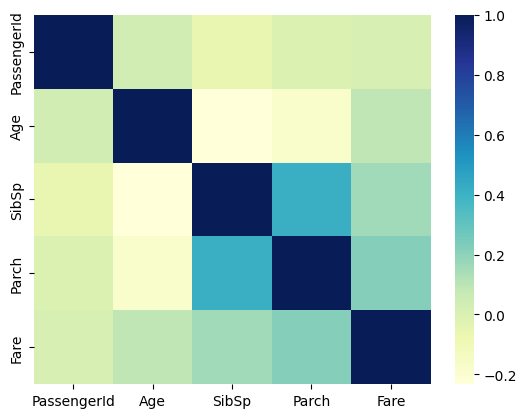

In [ ]:
sns.heatmap(df.corr(), cmap = "YlGnBu")

In [ ]:
df['family_size'] = df['Parch'] + df['SibSp']

In [ ]:
def family_type(number):
  if number == 0:
    return "Alone"
  elif number>0 and number<=4:
    return "Medium"
  else:
    return "Large"

In [ ]:
df['family_type'] = df['family_size'].apply(family_type)

In [ ]:
df.drop(columns = [])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42,0,0,244310,13.0000,S,0,Alone
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24,2,1,243847,27.0000,S,3,Medium
561,562,0,3,"Sivic, Mr. Husein",male,40,0,0,349251,7.8958,S,0,Alone
492,493,0,1,"Molson, Mr. Harry Markland",male,55,0,0,113787,30.5000,S,0,Alone
93,94,0,3,"Dean, Mr. Bertram Frank",male,26,1,2,C.A. 2315,20.5750,S,3,Medium


In [ ]:
df.drop(columns = ['SibSp', 'Parch', 'family_size'], inplace = True)

In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,13502,77.9583,S,Medium
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34,3101264,6.4958,S,Alone
860,861,0,3,"Hansen, Mr. Claus Peter",male,41,350026,14.1083,S,Medium
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9,363291,20.5250,S,Medium
476,477,0,2,"Renouf, Mr. Peter Henry",male,34,31027,21.0000,S,Medium
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30,364499,8.0500,S,Alone
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,C.A. 2673,20.2500,S,Medium
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",male,33,345780,9.5000,S,Alone
842,843,1,1,"Serepeca, Miss. Augusta",female,30,113798,31.0000,C,Alone
517,518,0,3,"Ryan, Mr. Patrick",male,29,371110,24.1500,Q,Alone


In [ ]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


##Handling Outliers

In [ ]:
import numpy as np
Q1 = np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)

outlier_low = Q1 - 1.5 * (Q3-Q1)
outlier_high = Q3 + 1.5 * (Q3-Q1)

df = df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [ ]:
df = pd.get_dummies(data=df, columns = ['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first=True)

In [ ]:
df.sample(5)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
272,273,1,"Mellinger, Mrs. (Elizabeth Anne Maidment)",41,250644,19.5000,1,0,0,0,1,0,1
163,164,0,"Calic, Mr. Jovo",17,315093,8.6625,0,1,1,0,1,0,0
75,76,0,"Moen, Mr. Sigurd Hansen",25,348123,7.6500,0,1,1,0,1,0,0
629,630,0,"O'Connell, Mr. Patrick D",29,334912,7.7333,0,1,1,1,0,0,0
744,745,1,"Stranden, Mr. Juho",31,STON/O 2. 3101288,7.9250,0,1,1,0,1,0,0


<ipython-input-79-fdb4973554b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "winter")


<Axes: >

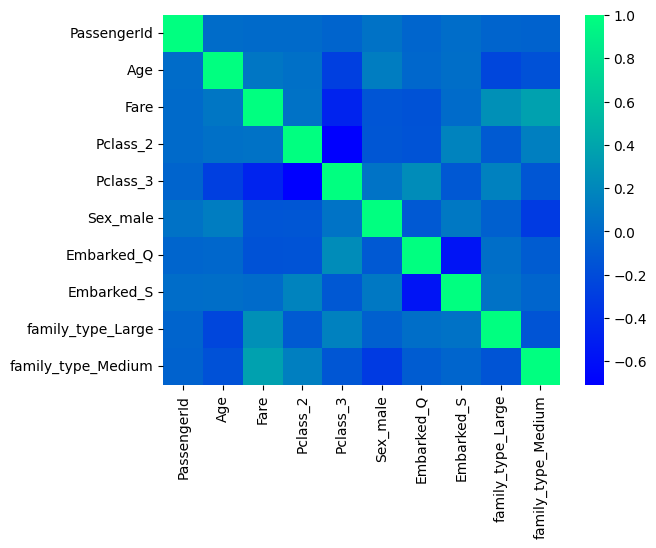

In [ ]:
sns.heatmap(df.corr(), cmap = "winter")

#Drawing conclusions



*   Chance of female survival is higher than male survival
*   Travelling in Pclass 3 was the deadliest
*   People going to C survived more
*   People in the age range 20 to 40 had a higher chance of not surviving
*   People traveling with smaller families had a higher chance of surviving the accident in comparison to people with large families and traveling alone


